In [1]:
import numpy as np
import matplotlib.pyplot as plt

import os
%matplotlib inline

In [2]:
def read_logs(file, use_scale_correction = True, use_bs_correction = True):
    #use correction because log files may have learning rates scaled off by a factor of S
    #use_bs_correction: log files report the final batch in an epoch with a smaller batch (80) so remove that one
    
    lines = os.popen('grep \'Sum of Var of Grad Noise\' '+file).read().split('\n')
    learning_rates = [float(l.split()[2][:-1]) for l in lines[:-1]]
    grad_var = [float(l.split()[9]) for l in lines[:-1]]
    
    learning_rates = np.array(learning_rates)
    grad_var = np.array(grad_var)
    
    if use_scale_correction:
        number_of_repeats = int(len(learning_rates) / 10)
        batch_sizes = np.tile(np.append(np.repeat(128, 9), 50000 % 128), number_of_repeats)
        learning_rates *= batch_sizes
        
    if use_bs_correction:
        learning_rates[range(9, len(learning_rates), 10)] = float('nan')
        
        
        
    return learning_rates, grad_var

In [9]:
prn_scratch = '/home/wesley/Desktop/nfs01_tesla/swa_uncertainties/grad_cov/prn110_scratch_0117_v2/log.out'
prn_swag = '/home/wesley/Desktop/nfs01_tesla/swa_uncertainties/grad_cov/prn110_180_0118/log.out'

In [10]:
prn_scratch_lr, prn_scratch_grad = read_logs(prn_scratch, use_scale_correction=False)
prn_swag_lr, prn_swag_grad = read_logs(prn_swag, use_scale_correction=False)


In [5]:
vgg_scratch = '/home/wesley/Desktop/nfs01_tesla/swa_uncertainties/grad_cov/vgg16_scratch_0117/log.out'
vgg_swag = '/home/wesley/Desktop/nfs01_tesla/swa_uncertainties/grad_cov/vgg16_180_0118/log.out'

vgg_scratch_lr, vgg_scratch_grad = read_logs(vgg_scratch)
vgg_swag_lr, vgg_swag_grad = read_logs(vgg_swag, use_scale_correction=False)

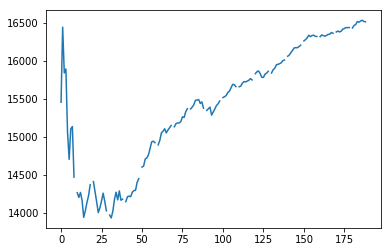

In [13]:
plt.plot(prn_swag_lr/128)

Text(0,0.5,'Optimal Learning Rate')

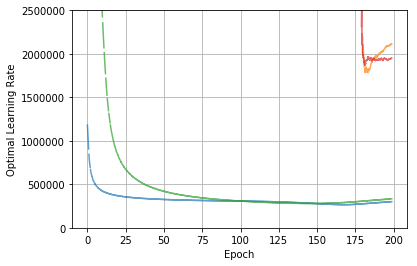

In [23]:
plt.plot(np.arange(0, 199, 0.1), prn_scratch_lr, label = 'PreResNet110 - SGD', alpha = 0.7)
plt.plot(np.arange(180, 199, 0.1), prn_swag_lr, label = 'PreResNet110 - SWA', alpha = 0.7)

plt.plot(np.arange(0, 199, 0.1), vgg_scratch_lr, label = 'VGG16 - Scratch', alpha = 0.7)
plt.plot(np.arange(179, 199, 0.1), vgg_swag_lr, label = 'VGG16 - SWA', alpha = 0.7)

plt.ylim((0,2.5e6))
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('Optimal Learning Rate')
#plt.savefig('/home/wesley/Documents/Papers/udl_paper_source/icml/plots/c100_lrplot_v1.eps')

Text(0,0.5,'tr(C)')

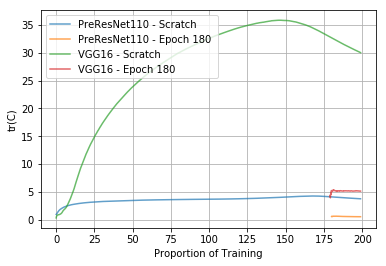

In [25]:
plt.plot(np.arange(0, 199, 0.1), prn_scratch_grad, label = 'PreResNet110 - Scratch', alpha = 0.7)
plt.plot(np.arange(180, 199, 0.1), prn_swag_grad, label = 'PreResNet110 - Epoch 180 ', alpha = 0.7)

plt.plot(np.arange(0, 199, 0.1), vgg_scratch_grad, label = 'VGG16 - Scratch', alpha = 0.7)
plt.plot(np.arange(179, 199, 0.1), vgg_swag_grad, label = 'VGG16 - Epoch 180', alpha = 0.7)

plt.legend(loc='upper left')
plt.grid()
plt.xlabel('Proportion of Training')
plt.ylabel('tr(C)')
#plt.savefig('/home/wesley/Documents/Papers/udl_paper_source/icml/plots/c100_gradnorm.eps')

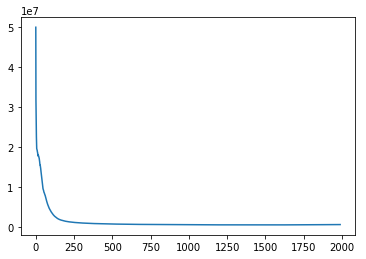

In [9]:
plt.plot(16000000 / np.array(vgg_scratch_grad))

In [64]:
2/50000 * 16000000/30

21.333333333333332

In [12]:
50000 % 128

80

In [15]:
np.concatenate([np.repeat(128, 9), 50000 % 128])

ValueError: all the input arrays must have same number of dimensions

In [19]:
arr = np.append(np.repeat(128, 9), 50000 % 128)

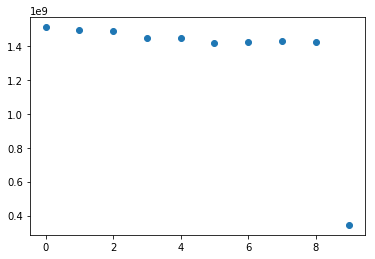

In [20]:
plt.scatter(range(10), vgg_scratch_lr[10:20] * arr)

In [21]:
vgg_scratch_lr[10:20]

array([11809472.768, 11695890.688, 11618368.64 , 11295405.952,
       11334359.168, 11092548.992, 11136884.224, 11178540.544,
       11123762.688,  4305353.92 ])

In [23]:
vgg_scratch_grad[10:20]

array([0.849, 0.857, 0.863, 0.887, 0.884, 0.903, 0.9  , 0.896, 0.901,
       0.909])

In [24]:
vgg_swag_lr[10]/vgg_swag_lr[19]

2.541198304033826

array([332136.448, 334518.528, 334415.232, 335143.168, 334250.752,
       335770.368, 336917.12 , 337038.592, 334902.144, 130700.72 ])

In [35]:
vgg_scratch_lr[range(9, len(vgg_scratch_lr), 10)] = float('nan')

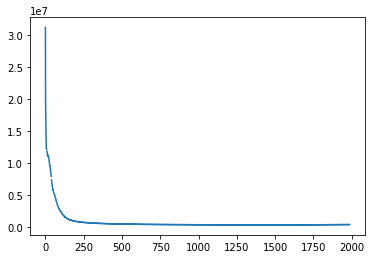

In [36]:
plt.plot(vgg_scratch_lr)

In [10]:
prn_scratch_lr

array([240076.817, 242622.644, 226363.312, 214317.963, 209294.733,
       203551.412, 198953.601, 194292.425, 190136.261,        nan,
       187809.839, 190176.478, 192050.253, 194010.262, 195822.231,
       195302.188, 194350.354, 193151.357, 190646.46 ,        nan,
       190176.28 , 192009.069, 193097.393, 193953.646, 193455.092,
       192604.023, 192563.929, 192400.1  , 191846.306,        nan,
       192207.71 , 193560.054, 194821.109, 196155.233, 196948.928,
       197120.107, 196755.772, 195942.399, 195200.98 ,        nan,
       195069.226, 196110.649, 196779.841, 196962.939, 196671.358,
       196731.986, 196546.729, 196469.993, 195847.688,        nan,
       195657.347, 196440.861, 197108.153, 197574.445, 198329.214,
       198465.577, 198638.256, 198977.426, 199297.633,        nan,
       200215.292, 200821.813, 201361.214, 202065.097, 202631.988,
       203006.551, 203414.879, 203857.145, 204050.99 ,        nan,
       204499.696, 205269.229, 206228.569, 207119.779, 207700.